In [12]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

# Load Dataset

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0],28,28,1))
testX = testX.reshape((testX.shape[0],28,28,1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Create Pixel Data of Images

In [3]:
trainX = trainX.astype("float32")
testX = testX.astype("float32")
trainX = trainX/255.0
testX = testX/255.0

# Defining First Model

In [4]:
def define_model_base():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and Evaluate the model

In [5]:
def train_evaluate_model(dataX, dataY, define_model, n_folds = 5):
    scores, histories = list(),list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for i, (train_ix, test_ix) in enumerate(kfold.split(dataX)):
        print("\n#Iteration ", i+1, end="\n\n")
        model = define_model()
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX,testY))
        _, acc = model.evaluate(testX,testY)
        print("\n> %.3f" % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores,histories

# Performance Visualization and Summarization

In [6]:
def performance_visualization(histories):
    for i in range(len(histories)):
        plt.subplot(2, 1, 1)
        plt.title("Cross Entropy Loss")
        plt.plot(histories[i].history['loss'],color='blue',label='train')
        plt.plot(histories[i].history['val_loss'], color='orange',label='test')
        plt.subplot(2, 1, 2)
        plt.title('Accuracy')
        plt.plot(histories[i].history['accuracy'],color='blue',label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange',label='test')
    plt.show()

In [7]:
def performance_summarization(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    plt.boxplot(scores)
    plt.show()

# Train First Model and Analyse it

In [8]:
scores_base, histories_base = train_evaluate_model(trainX,trainY, define_model_base)


#Iteration  1

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.1807 - accuracy: 0.9442 - val_loss: 0.0915 - val_accuracy: 0.9718
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0603 - accuracy: 0.9822 - val_loss: 0.0654 - val_accuracy: 0.9815
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0613 - val_accuracy: 0.9808
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0254 - accuracy: 0.9926 - val_loss: 0.0649 - val_accuracy: 0.9818
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0179 - accuracy: 0.9947 - val_loss: 0.0607 - val_accuracy: 0.9827
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0525 - val_accuracy: 0.9862
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.05

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


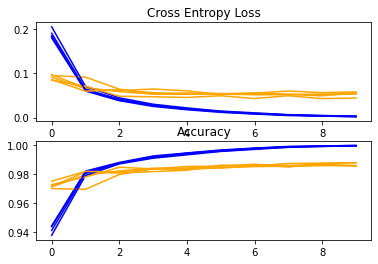

In [9]:
performance_visualization(histories_base)

Accuracy: mean=98.668 std=0.101, n=5


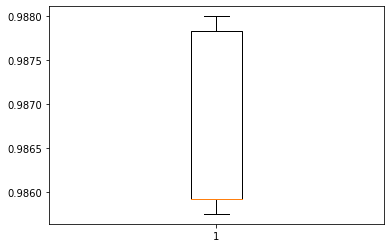

In [10]:
performance_summarization(scores_base)

# Improvised Model 1

In [13]:
def define_model_improved_1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
scores_improved_1, histories_improved_1 = train_evaluate_model(trainX,trainY, define_model_improved_1)


#Iteration  1

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1396 - accuracy: 0.9575 - val_loss: 0.0916 - val_accuracy: 0.9733
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0538 - accuracy: 0.9841 - val_loss: 0.0580 - val_accuracy: 0.9822
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0539 - val_accuracy: 0.9832
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.0557 - val_accuracy: 0.9841
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 0.0567 - val_accuracy: 0.9833
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0113 - accuracy: 0.9967 - val_loss: 0.0514 - val_accuracy: 0.9858
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


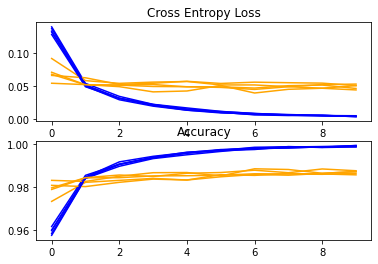

In [15]:
performance_visualization(histories_improved_1)

Accuracy: mean=98.690 std=0.069, n=5


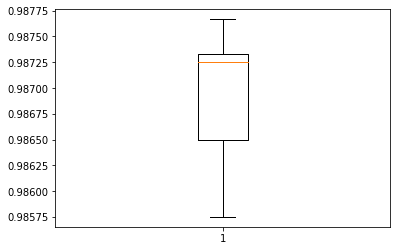

In [16]:
performance_summarization(scores_improved_1)

# Improvised Model 2

In [17]:
def define_model_improved_2():
    model = Sequential()
    model.add(Conv2D(32,(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
scores_improved_2, histories_improved_2 = train_evaluate_model(trainX,trainY, define_model_improved_2)


#Iteration  1

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.1197 - accuracy: 0.9641 - val_loss: 0.0846 - val_accuracy: 0.9730
Epoch 2/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0477 - val_accuracy: 0.9868
Epoch 3/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0216 - accuracy: 0.9929 - val_loss: 0.0712 - val_accuracy: 0.9815
Epoch 4/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0123 - accuracy: 0.9958 - val_loss: 0.0487 - val_accuracy: 0.9879
Epoch 5/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0566 - val_accuracy: 0.9855
Epoch 6/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0413 - val_accuracy: 0.9907
Epoch 7/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.0013 - accuracy: 0.9996 - va

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


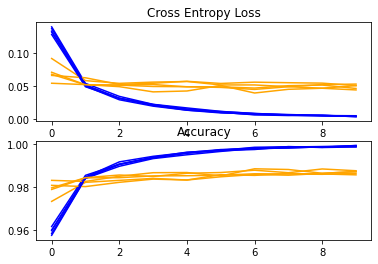

In [19]:
performance_visualization(histories_improved_1)

Accuracy: mean=98.690 std=0.069, n=5


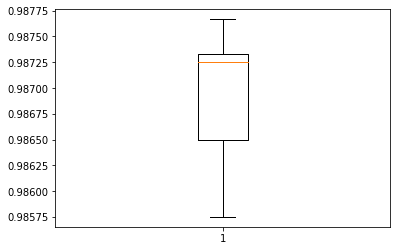

In [20]:
performance_summarization(scores_improved_1)

# Using the best model from the above three models

In [21]:
model = define_model_improved_2()

In [22]:
model.fit(trainX,trainY,epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1120 - accuracy: 0.9666
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0397 - accuracy: 0.9879
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0147 - accuracy: 0.9949
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0108 - accuracy: 0.9962
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0065 - accuracy: 0.9978
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0044 - accuracy: 0.9985
Epoch 8/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0024 - accuracy: 0.9991
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 10/10
1875/1875 [==============================] - 25s 14m

In [23]:
_,acc = model.evaluate(testX, testY)

313/313 [==============================] - 2s 6ms/step - loss: 0.0245 - accuracy: 0.9943


In [24]:
print("> %.3f" % (acc*100.0))

> 99.430
